# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Bor-Jiun Tseng

**ID**: bt366

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [109]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\nobel\OneDrive\桌面\BEE5750\hw\hw1-BorJiuntseng`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [110]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

In [3]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [14]:
function minimum(array)
    min_value = array[1]
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i] 
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


1. I think the login error is setting the min_value at 0, if non of the number in the array is below 0, then it'll output 0 as the product
2. setting the min_value as any number in the array will instead compare the number within the array, therefore I will set min_value as the first number of the array, array[1]

#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [29]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
using Statistics
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end
average_grade = class_average(student_grades)
@show average_grade;

average_grade = 94.4


1. when running the code, it shows average_grade not define, we can see that average_grade is only defined within the function, therefore, 
I added average_grade = class_average(student_grades) outside the function.
2. then the error appears again with mean not define. afterlooking up on 

#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [1]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zeros(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.359


after looking up method error, I find out that setting outcomes to zero(n_trial) is the method error, and should be zeros, so that the win_prob doesn't compute as 0

### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

So after evaluating the "mystery_function", I believe that it's trying to identify and output each elements that appears in an array,
and elements that have the same value will only be recorded once.

In [10]:
#=The purpose for this function is to identify and record each elements that appears in an array, 
if elements have the same value it will only be recorded once.=#
function mystery_function(values) 
    y = [] #creating an empty 1 dimensional array that can hold the values.
    for v in values  #creating a for loop checking each elements(v) in values
        if !(v in y) #checking if v is in array y, and if not, its' adding v into y
            append!(y, v)
        end
    end
    return y   #return the array created in the beginning           
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


In [2]:
array_x = [1, 2, 3, 4, 3, 4, 2, 1]
@show unique(array_x)


unique(array_x) = [1, 2, 3, 4]


4-element Vector{Int64}:
 1
 2
 3
 4

unique(array)
This function does the same thing as mystery_function, it dientify the unique elements in an array.

**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

1. writing a function computeing the mean v, setting total value to 0, and adding each value to the total by total += i, mean = total / leanth of the array.
2. get a random vector of length 10 by using rand(), use the function above to calculate the mean of this random vector
3. using the broadcasting technique to substract the mean value of random vect from the random vector
4. compute the new mean using the function above, the answer is very close to 0, so we want to round up so it's 0

In [98]:
#Problem 3
function compute_mean(v)
    total = 0.0
    for i in v
        total += i
    end
    mean = total / length(v)
    return mean
end
random_vect = rand(10)
mean_vect = compute_mean(random_vect)
result_vect = random_vect .- mean_vect
new_mean = compute_mean(result_vect)
rounded_new_mean = round(new_mean; digits = 2)
@show rounded_new_mean

rounded_new_mean = 0.0


0.0

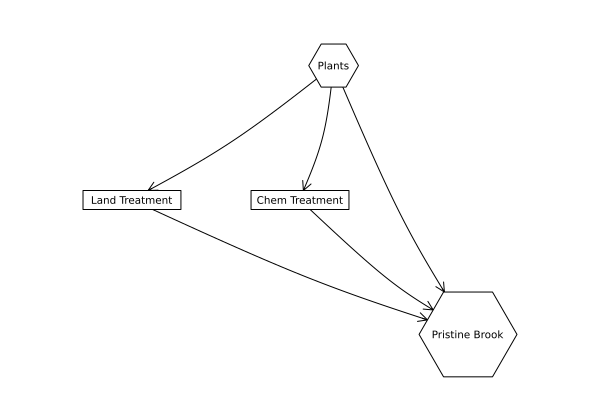

In [105]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plants", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => "", (1,3) => "", (1, 4) => "",(2, 4) => "",(3, 4) => "")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]
p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?

### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

When calculating efficiency, checmical treatment need to have 40 m^3 or less to remove at least 80% of yuk which is what the government 
wanted.
I'm calculating the cost first, and for land disposal, the cost will be (amount of waste in m3)^2/20, and chemical treatment will be (amount of waste in m3)*1.5
then I'm calculating the efficiency, for land fill it's 0.8*x, and for chemical treatment the fomula given is e = 1-0.005*(amount of waste in m3).
therefore by creating the function, we can get the cost of each plan. However, once chemical treatment is under 40m3, it'll be more efficient, therefore we're able to dump
some waste directly to meet the standard.
I use number of value to findout that when we have 60 at land fill, and 40 at chemical treatment, we'll minimize the cost of the plan
I tried to graph out the plot, and y1 is landfill, y2 is chemcial

a = [180.0, 211.25, 245.0, 281.25, 320.0, 361.25, 405.0, 451.25, 500.0]
b = [60.0, 52.5, 45.0, 37.5, 30.0, 22.5, 15.0, 7.5, 0.0]
c = [12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
d = [8.0, 6.125, 4.5, 3.125, 2.0, 1.125, 0.5, 0.125, 0.0]


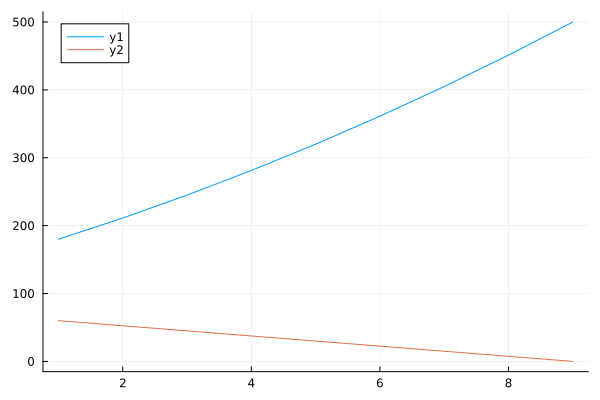

In [32]:
#treatment cost&efficiency
using Plots
function treatment_cost(w, x, y, z) #create a function that calculate treatment cost
    return (x^2/20, y*1.5, x*0.2, y-y*(1-0.005*y))
end
landfill = [60, 65, 70, 75, 80, 85, 90, 95, 100] #number of waste in land dispose
chemical = [40, 35, 30, 25, 20, 15, 10, 5, 0] #number of waste in chemi
output = treatment_cost.(landfill, landfill, chemical, chemical)
a = [out[1] for out in output]
b = [out[2] for out in output]
c = [out[3] for out in output]
d = [out[4] for out in output]
@show a
@show b
@show c
@show d
landfill = a
chemical = b
plot([landfill, chemical])


#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

In [4]:
#= 1 for i in 0:149 if !iseven(i), writing this down after reading comprehension page, so it'll have 1 for every number between 0 to 149
that's not even, and basically I just need the sum of it to know how many are odd numbers=#
count = sum(1 for i in 0:149 if !iseven(i))
@show count 

count = 75


75

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

So for this quesiton, I wanted to create a for loop that can calculate the polynomial with loop
so first I created the for loop that can calculate the sum of each individual element within the polynomial
and because there's a number for constant, so I use x^(i-1) for the function
a(length of the equation-(element in the array-1)) gives me the coefficient for this equation, for instance if length is 4
a(4-(1-1)) will give me the last coefficient of the polynomial, combined with x^(1-1) gives me the value of the constant.
loop this for the length of the polynomial, we'll get the result.

In [35]:
function polynomial(x, a)
   result = 0 #setting a result that holds value
    n = length(a) #length of the equation
    for i in 1:n
        result += a[n-(i-1)]*x^(i-1) 
    end
    return result
end
coeff = [2, -1, 0, 1]
test = polynomial(2, coeff)
@show test


test = 13


13

## References

List any external references consulted, including classmates.